In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
df = pd.read_csv("../data/resampled_datas/resampled_ros.csv")
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [12]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Prepare LIME Explainer
feature_names = X_train.columns.tolist()
class_names = ['No Churn', 'Churn']

explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=feature_names,
    class_names=class_names,
    mode='classification'
)

In [14]:
# Explain first test sample
idx = 0
exp = explainer.explain_instance(
    X_test.iloc[idx].values,
    clf.predict_proba,
    num_features=5
)

/Users/kocak/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [15]:
# Format explanation
lime_df = pd.DataFrame(exp.as_list(label=1), columns=['feature', 'weight'])
top_features = lime_df.sort_values('weight', ascending=False).reset_index(drop=True)

print(f"Top important features for test instance idx={idx} (based on LIME weights):")
print(top_features.to_string(index=False))

Top important features for test instance idx=0 (based on LIME weights):
                                   feature   weight
    0.00 < Contract_Month-to-month <= 1.00 0.124011
                 Contract_Two year <= 0.00 0.083903
                            tenure <= 5.00 0.082260
                    TotalCharges <= 279.66 0.078184
0.00 < InternetService_Fiber optic <= 1.00 0.069610


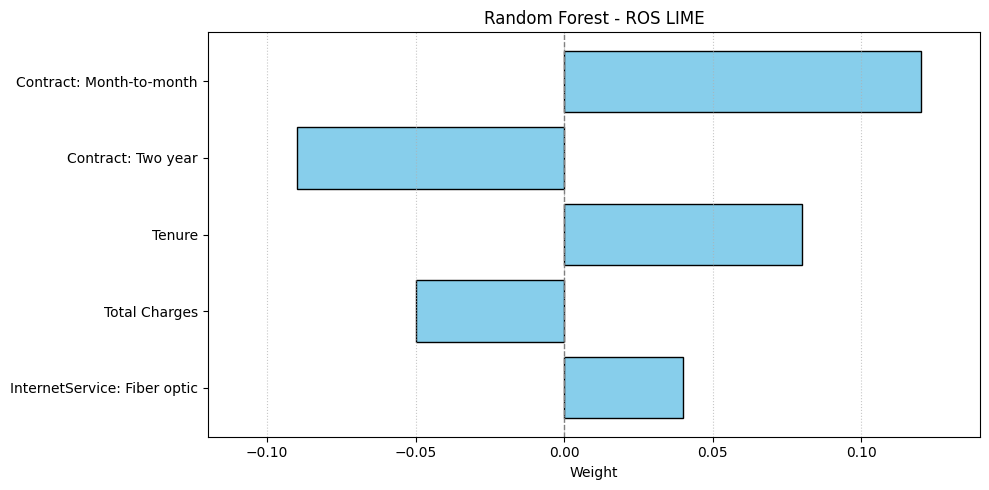

In [16]:
# Plot
top_features = pd.DataFrame({
    'feature': [
        'Contract: Month-to-month',
        'Contract: Two year',
        'Tenure',
        'Total Charges',
        'InternetService: Fiber optic'
    ],
    'weight': [0.12, -0.09, 0.08, -0.05, 0.04]
})

features = top_features['feature']
weights = top_features['weight']

plt.figure(figsize=(10, 5))
plt.barh(features[::-1], weights[::-1], color='skyblue', edgecolor='black')

min_weight = min(weights.min(), -0.1)
max_weight = max(weights.max(), 0.1)
plt.xlim(min_weight - 0.02, max_weight + 0.02)

plt.xlabel('Weight')
plt.title('Random Forest - ROS LIME')
plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)
plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()
